## Random Sampling and Sample Bias

Sample represents a subset from a larger dataset, while population represents the ideal dataset for a very large sample size.

Data scientists usually work with samples most of the time, since it is impossible to obtain data for the entire population of interest.

There are two main sampling techniques available:
1. <b>Random sampling</b>: Selecting elements into a sample at random (Simple random sample)
2. <b>Stratified sampling</b>: Dividing population into strata (groups) and randomly sampling from every strata

Note that both sampling techniques can be done with (bootstrapping) or without replacement

These sampling techniques could lead to occurence of bias if not done properly.

Bias in statistics refers to measurement or sampling errors that are systematic and not caused by random chance.

A specific concern for data scientists when reviewing large data sets is the vast search effect, which is bias from repeated data modelling or modelling data with large number of predictor variables.

To overcome vast search effect, one or more holdout sets may be used to validate model performance.

The following codes below show the difference between random sampling and stratified sampling of a given dataset:

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('https://people.sc.fsu.edu/~jburkardt/data/csv/mlb_players.csv', sep=',\s*', engine='python').dropna()

In [2]:
# Random sampling without replacement
train = data.sample(frac=0.7)
test = data.drop(train.index)
len(train),len(test)

(724, 310)

In [3]:
train_y = train['"Position"']
test_y = test['"Position"']
train_prop = pd.Series(train_y.value_counts()/len(train_y))
test_prop = pd.Series(test_y.value_counts()/len(test_y))

In [4]:
pd.DataFrame([train_prop, test_prop, train_prop-test_prop],index = ['train','test','difference'])

,"""Relief Pitcher""","""Outfielder""","""Starting Pitcher""","""Catcher""","""Second Baseman""","""Shortstop""","""First Baseman""","""Third Baseman""","""Designated Hitter"""
train,0.327348,0.194751,0.191989,0.070442,0.056630,0.052486,0.045580,0.044199,0.016575
test,0.251613,0.170968,0.264516,0.080645,0.054839,0.045161,0.070968,0.041935,0.019355
difference,0.075735,0.023784,-0.072527,-0.010203,0.001791,0.007325,-0.025388,0.002263,-0.002780


In [5]:
# Stratified sampling without replacement
train = data.groupby('"Position"', group_keys=False).apply(lambda x: x.sample(frac=0.7))
test = data.drop(train.index)
len(train),len(test)

(723, 311)

In [6]:
train_y = train['"Position"']
test_y = test['"Position"']
train_prop = pd.Series(train_y.value_counts()/len(train_y))
test_prop = pd.Series(test_y.value_counts()/len(test_y))

In [7]:
pd.DataFrame([train_prop, test_prop, train_prop-test_prop],index = ['train','test','difference'])

,"""Relief Pitcher""","""Starting Pitcher""","""Outfielder""","""Catcher""","""Second Baseman""","""First Baseman""","""Shortstop""","""Third Baseman""","""Designated Hitter"""
train,0.304288,0.214385,0.188105,0.073306,0.056708,0.052559,0.049793,0.042877,0.017981
test,0.305466,0.212219,0.186495,0.073955,0.054662,0.054662,0.051447,0.045016,0.016077
difference,-0.001179,0.002166,0.001610,-0.000649,0.002046,-0.002104,-0.001654,-0.002139,0.001903


Stratified sampling ensures there is less proportion imbalance between training set and test set for every class at every iteration, compared to random sampling Since random sampling technique generates different training set and test set at every iteration, proportion of values between training set and test set varies for every iteration.

## Sampling Distribution of Sample Statistic

<b>Sampling distribution</b> refers to frequency distribution of sample statistic over many samples or resamples. This differs from data distribution, which refers to frequency distribution of individual values in a dataset.

From sampling distribution, <b>Central Limit Theorem</b> states that the tendency of sampling distribution to follow normal distribution as sample size increases. 

Note that data distribution may not necessarily be normally distributed for central limit theorem to apply as long as sample size is large enough and distribution is not too heavily skewed.

When working with sampling distributions, there is a clear distinction between standard deviation and standard error that needs to be addressed. While standard deviation represents variability of data points, <b>standard error</b> represents variability of sample statistic over a sampling distribution.

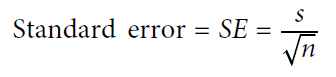

Data scientists should be aware of the use of Central Limit Theorem, however it only plays a small role in data science such that an alternative option to central limit theorem is using bootstrapping concept.

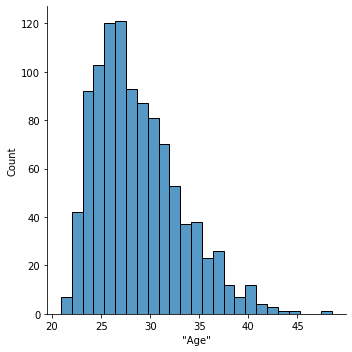

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(x = '"Age"', data=data, kind='hist')

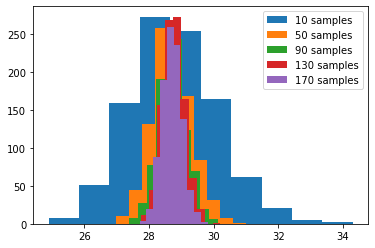

In [9]:
# Central Limit Theorem
for size in range(10,200,40):
    mean = []
    for count in range(1000):
        mean.append(data['"Age"'].sample(size).mean())
    plt.hist(mean)
plt.legend([str(size) + ' samples' for size in range(10,200,40)])
plt.show()

In [10]:
# Standard deviation of age data
data['"Age"'].var()

18.66507881908619

In [11]:
# Unbiased standard error of sample mean
data['"Age"'].sem()

0.13435525103523493

## Bootstrapping

Bootstrapping simply refers to sampling with replacement from a given dataset.

Unlike Central Limit Theorem, bootstrapping does not require normality assumption of data or sample statistic being normally distributed.

Bootstrapping concept can be observed in predictive models, where multiple bootstrap sample predictions are aggregated (i.e. bagging method, random forest)

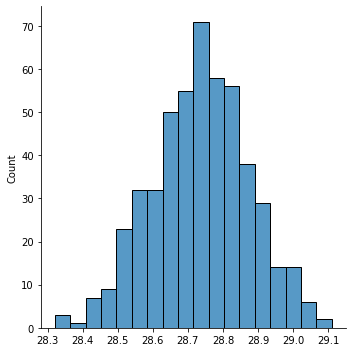

In [12]:
# Bootstrapping example
from sklearn.utils import resample

results = []

for nrepeat in range(500):
    sample = resample(data['"Age"'])
    results.append(sample.mean())

sns.displot(results, kind='hist')
plt.show()

In [13]:
# Bootstrap statistics
print("Original statistic (mean): "+str(data['"Age"'].mean()))
print("Bias: "+str(np.mean(results) - data['"Age"'].mean()))
print("Standard error: "+str(pd.Series(results).sem()))

Original statistic (mean): 28.73671179883944
Bias: -0.0018664410057986913
Standard error: 0.006174528329846535


## Confidence Interval

<b>Confidence level</b> represents the percentage of confidence interval from the same population that is expected to contain sample statistic.

Confidence level is usually determined based on domain knowledge, otherwise the default percentage used is 95%.

<b>Confidence interval</b> represents the interval that encloses central x% of sampling distribution of a sample statistic.

Confidence interval can be used to communicate the potential error of sample statistics and for making decisions of whether a larger sample size is needed.

Bootstrapping can be used to generate confidence intervals for larger sample size.



In [14]:
# t-distribution confidence interval for sample size < 30 with bootstrapping
import scipy.stats as st
for nsamples in range(2,30,5):
    sample = resample(data['"Age"'], n_samples=nsamples)
    print(f"95% C.I for {nsamples} samples",st.t.interval(alpha=0.95, df = len(sample)-1, loc=np.mean(sample), scale = st.sem(sample)))

95% C.I for 2 samples (-39.284180855569964, 104.80418085556997)
95% C.I for 7 samples (24.55548689360086, 31.895941677827704)
95% C.I for 12 samples (25.64062849761106, 29.346038169055596)
95% C.I for 17 samples (26.85034022095156, 31.07318919081316)
95% C.I for 22 samples (27.147770026231775, 30.65859361013186)
95% C.I for 27 samples (25.896304999512676, 28.717028333820647)


In [15]:
# normal distribution confidence interval for sample size >= 30 with bootstrapping
for nsamples in range(30,1000,200):
    sample = resample(data['"Age"'], n_samples=nsamples)
    print(f"95% C.I for {nsamples} samples",st.norm.interval(alpha=0.95, loc=np.mean(sample), scale = st.sem(sample)))

95% C.I for 30 samples (27.148748301301133, 29.908585032032207)
95% C.I for 230 samples (28.500658237803076, 29.602646110022977)
95% C.I for 430 samples (28.329997454504998, 29.193676964099637)
95% C.I for 630 samples (28.42484028318969, 29.112810510461095)
95% C.I for 830 samples (28.33975400476524, 28.920679730174534)


## Normal Distribution

For data to be normally distributed, distribution of data needs to satisfy Chebyshev's inequality where:

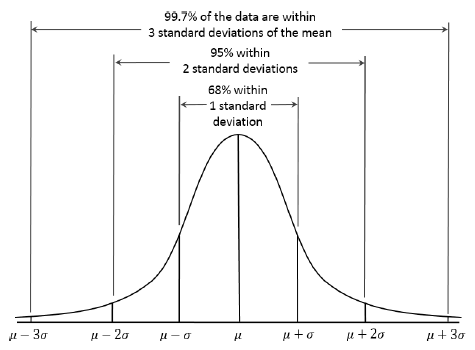

Note that for non-normal distribution, Chebyshev's inequality states that:

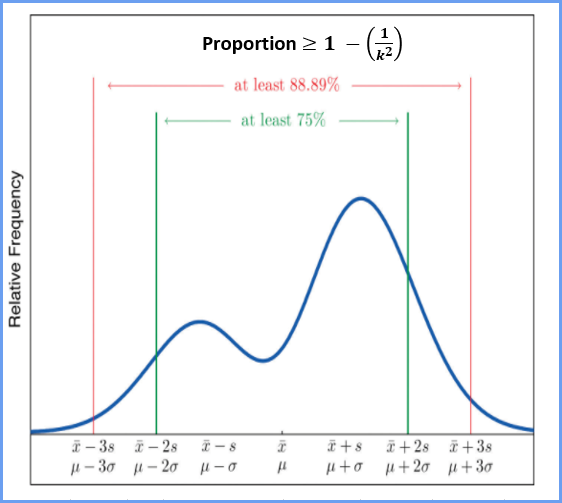

Gaussian normal distribution can be standardized into standard normal distribution with zero mean and standard deviation of one.

This transformation of data into standard normal distribution (z-distribution) is known as <b>normalization/standardization</b>.

For visual representation of how close a data distribution is to normal distribution, <b>Q-Q plot</b> is used. If most of the points roughly fall on the diagonal line, then the sample distribution can be considered close to normal.

In [16]:
data = pd.read_csv(r'C:\Users\yixia\OneDrive\Desktop\Data Science Notes\Python\Data_sources\Indian_cities.csv')

In [17]:
st.normaltest(data['literates_total'])

NormaltestResult(statistic=712.2611780943257, pvalue=2.1599830337378894e-155)

In [18]:
# Normality test using anderson test
for column in data.iloc[:,4:].drop('location',axis=1).columns:
    result = st.anderson(data[column],'norm')
    if result[0]>result[1][2]:
        print(f"{column} is not normally distributed")
    else:
        print(f"{column} is normally distributed")

population_total is not normally distributed
population_male is not normally distributed
population_female is not normally distributed
0-6_population_total is not normally distributed
0-6_population_male is not normally distributed
0-6_population_female is not normally distributed
literates_total is not normally distributed
literates_male is not normally distributed
literates_female is not normally distributed
sex_ratio is not normally distributed
child_sex_ratio is not normally distributed
effective_literacy_rate_total is not normally distributed
effective_literacy_rate_male is not normally distributed
effective_literacy_rate_female is not normally distributed
total_graduates is not normally distributed
male_graduates is not normally distributed
female_graduates is not normally distributed


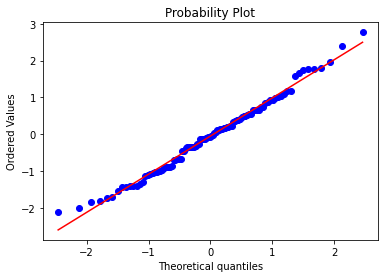

In [19]:
#QQ plot for normal distribution
st.probplot(np.random.normal(size=100), dist='norm', plot=plt)
plt.show()

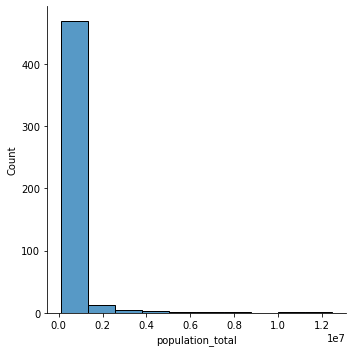

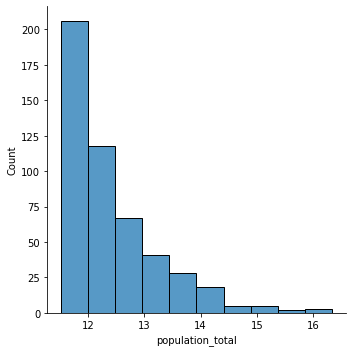

In [20]:
## Heavily Skewed distribution
sns.displot(data=data, x='population_total',bins=10)
sns.displot(data=np.log(data['population_total']), bins=10)

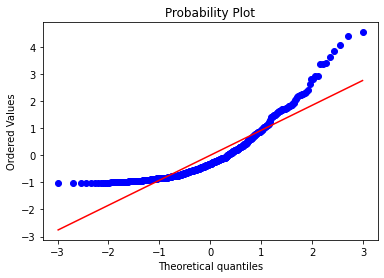

In [21]:
#QQ plot for skewed distribution
st.probplot((np.log(data['population_total']) - np.mean(np.log(data['population_total'])))/np.std(np.log(data['population_total'])), dist='norm', plot=plt)
plt.show()

In [22]:
# Computing z score
st.norm.ppf(0.975)

1.959963984540054

In [23]:
# Computing probability (left-area under curve of standard normal distribution (default))
st.norm.cdf(-2.25)

0.012224472655044696

## T Distribution

T distribution is similar to normal distribution with bell shaped curve, except it is thicker and longer on both end tails of the curve.

When population variance is unknown and sample size is not large enough, t distribution is suitable to use.

T distribution is widely used as reference basis for distribution of sample means, differences between two sample means, regression parameters and more. However, t distribution is mostly used in classical statistical inference, instead of central use in data science.

## Binomial Distribution

Binomial distribution applies to scenarios with two (binary) possible outcomes having defined probabilities.

Binomial distribution represents the distribution of number of successes over a certain number of trials.

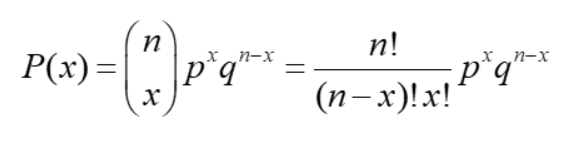

Mean of binomial distribution = n*p

Variance of binomial distribution = n*p*(1-p)

Note that having a large sample size n and probability of success, p not being too close to 0 or 1 can be approximated by the normal distribution.

In [24]:
# Probability mass function of binomial distribution with 2 success out of 5 trials with 0.1 probability of success
st.binom.pmf(2, n=5, p=0.1)

0.07289999999999992

In [25]:
# Cumulative density function of binomial distribution up till 2 success out of 5 trials with 0.1 probability of success
st.binom.cdf(2, n=5, p=0.1)

0.99144

## Chi Square Distribution

Chi square distribution focuses on count of items belonging to specific categories, while measuring <b>extent of difference between actual and expected counts</b>.

Chi square distribution is mostly used in goodness of fit test, which will be covered in Part 3.

## F Distribution

F distribution is similar to chi square distribution, except that F distribution measures <b>extent of difference between actual and expected continuous values</b>.

F distribution is mostly used in ANOVA (Analysis of Variance) test, which will be covered in Part 3.

## Poisson, Exponential and Weibull Distribution

For measuring distribution related to event occurence, lambda measure is required, which represents the <b>rate of event occurence</b>.

Three distribution types related to event occurence:

1. <b>Poisson</b>: Frequency distribution of number of events within a fix sampled units of time. (i.e. number of website visitors per hour)

2. <b>Exponential</b>: Frequency distribution of time between two consecutive events. (i.e. time taken for green traffic light to turn red)

3. <b>Weibull</b>: Generalized version of exponential distribution with varying event rates over time. (i.e. time taken for machine failures - life data analysis)

Note that both poisson and exponential distribution assumes constant rate of event occurence.

In [26]:
# Generating random variables of poisson distribution with 2 events per time period over 20 samples
st.poisson.rvs(2, size=20)

array([3, 3, 1, 2, 1, 0, 5, 0, 1, 1, 8, 2, 2, 0, 2, 6, 5, 1, 1, 0])

In [27]:
# Generating random variables of exponential distribution with 2 events per time period over 20 samples
st.expon.rvs(2, size=20)

array([2.78373396, 3.11339253, 3.58940593, 4.97388271, 2.2707699 ,
       2.65153428, 2.11373173, 2.51559382, 2.73457575, 2.17596436,
       2.68141471, 2.07150955, 3.04789885, 2.08942344, 2.74537939,
       3.95374302, 2.44610644, 2.34257387, 2.2975934 , 3.1082738 ])

In [28]:
# Generating random variables of weibull distribution with shape of 1.5 and characteristic life of 5000 over 20 samples
st.weibull_min.rvs(1.5, scale=5000, size=20)

array([ 5230.03517566,  2556.36185315,  2095.81691632,  3151.08482163,
         454.46773996,  2205.03580298,  5838.73427987,   424.30823685,
        1229.25870995,  6110.73498351,  3354.98559541,  7355.88015447,
       11356.52011065,  6780.45350877,  5636.93328955,   153.27402197,
         570.88102607,  5567.00303733,  7583.98941568,  6509.34030446])

## Power Law Distribution (Pareto)

Power Law explains the relationship between two numerical variables, where a relative change in one variable results in proportonal change of the other variable.

This law is especially applicable to Pareto distribution, where 80% of outcomes are due to 20% of causes. Examples related to Pareto distribution are hard disk drive error rates, standardized price returns on individual stocks and length distribution in jobs assigned to supercomputers.

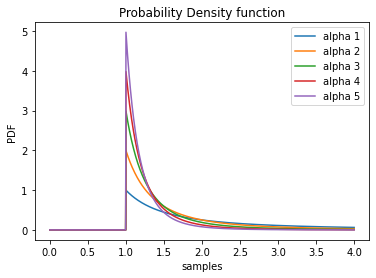

In [29]:
# Example of Pareto distribution
alpha = [1, 2, 3,4,5] #list of values of shape parameters
samples = np.linspace(start=0, stop=4, num=1000)
for a in alpha:
    output = np.array([st.pareto.pdf(x=samples, b=a, loc=0, scale=1)])
    plt.plot(samples, output.T, label='alpha {0}' .format(a))
plt.xlabel('samples')
plt.ylabel('PDF')
plt.title('Probability Density function')
plt.rcParams["figure.figsize"] = [8,8]
plt.legend(loc='best')
plt.show()

## LogNormal Distribution

Sometimes, the original data is not normally distributed, such that it is right skewed. However, taking the natural logarithm of the data results in normal distribution.

Thus, this type of distribution is known as lognormal distribution, which is one of the useful methods of data distributions to make variables normally distributed.

The following code below shows the comparison between normal distribution and lognormal distribution:

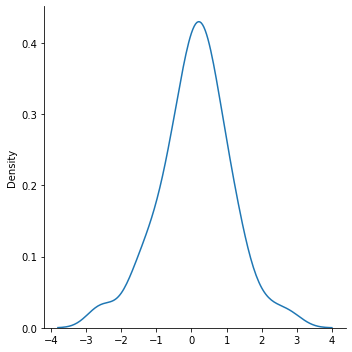

In [30]:
# KDE plot of normal distribution for original data
sns.displot(st.norm.rvs(size=100),kind='kde')
plt.show()

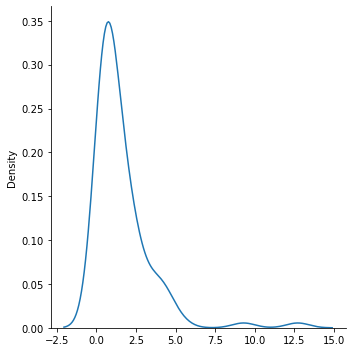

In [31]:
# KDE plot of lognormal distribution for original data
sns.displot(st.lognorm.rvs(s=1,size=100),kind='kde')
plt.show()

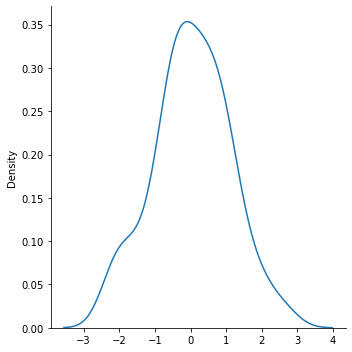

In [32]:
# KDE plot of lognormal distribution ln(data)
sns.displot(np.log(st.lognorm.rvs(s=1,size=100)),kind='kde')
plt.show()